In [ ]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [4]:
df = pd.read_csv(r"C:\Users\Python Class\Employee_Attrition_p3\Employee-Attrition - Employee-Attrition.csv")
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
pd.options.display.max_columns = 500
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Data Cleaning

In [6]:
df.shape

(1470, 35)

In [7]:
#finding missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
#finding duplicates
df.duplicated().sum()

np.int64(0)

Data Preprocessing

Binary Encoding

--Why this is good:
Efficient: Saves memory and computation time (compared to one-hot encoding).

Simple: Ideal for binary categorical variables.

Compatible: Works well with tree-based models like RandomForestClassifier.

In [9]:
#encoding
#BInary : Attrition , Gender , Over 18 ,OverTime

#for Reducing memory and simplifying categorical variables
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if str(x).strip().lower() == 'male' else 0)
df['Over18'] = df['Over18'].apply(lambda x: 1 if str(x).strip().lower() == 'y' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,1,41,4,2,Laboratory Technician,4,Married,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,1,42,2,3,Healthcare Representative,1,Married,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,1,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,1,63,2,2,Sales Executive,2,Married,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8


One Hot Encoding

Converts categorical variables into a set of binary columns (0s and 1s).

Each category gets its "own spot" (column), and only one column is 1 for each row — the rest are 0.

In [10]:
#One-Hot Encoding - BusinessTravel,Department,EducationField,JobRole , MaritalStatus

df = df.join(pd.get_dummies(df['BusinessTravel'])).drop('BusinessTravel',axis=1)
df = df.join(pd.get_dummies(df['Department'],prefix='Department')).drop('Department',axis=1)
df = df.join(pd.get_dummies(df['EducationField'],prefix='Education')).drop('EducationField',axis=1)
df = df.join(pd.get_dummies(df['JobRole'],prefix='Role')).drop('JobRole',axis=1)
df = df.join(pd.get_dummies(df['MaritalStatus'],prefix='MaritalStatus')).drop('MaritalStatus',axis=1)

In [20]:
df = df.map(lambda x: 1 if x is True else 0 if x is False else x)

In [12]:
df = df.drop('EmployeeNumber',axis=1)

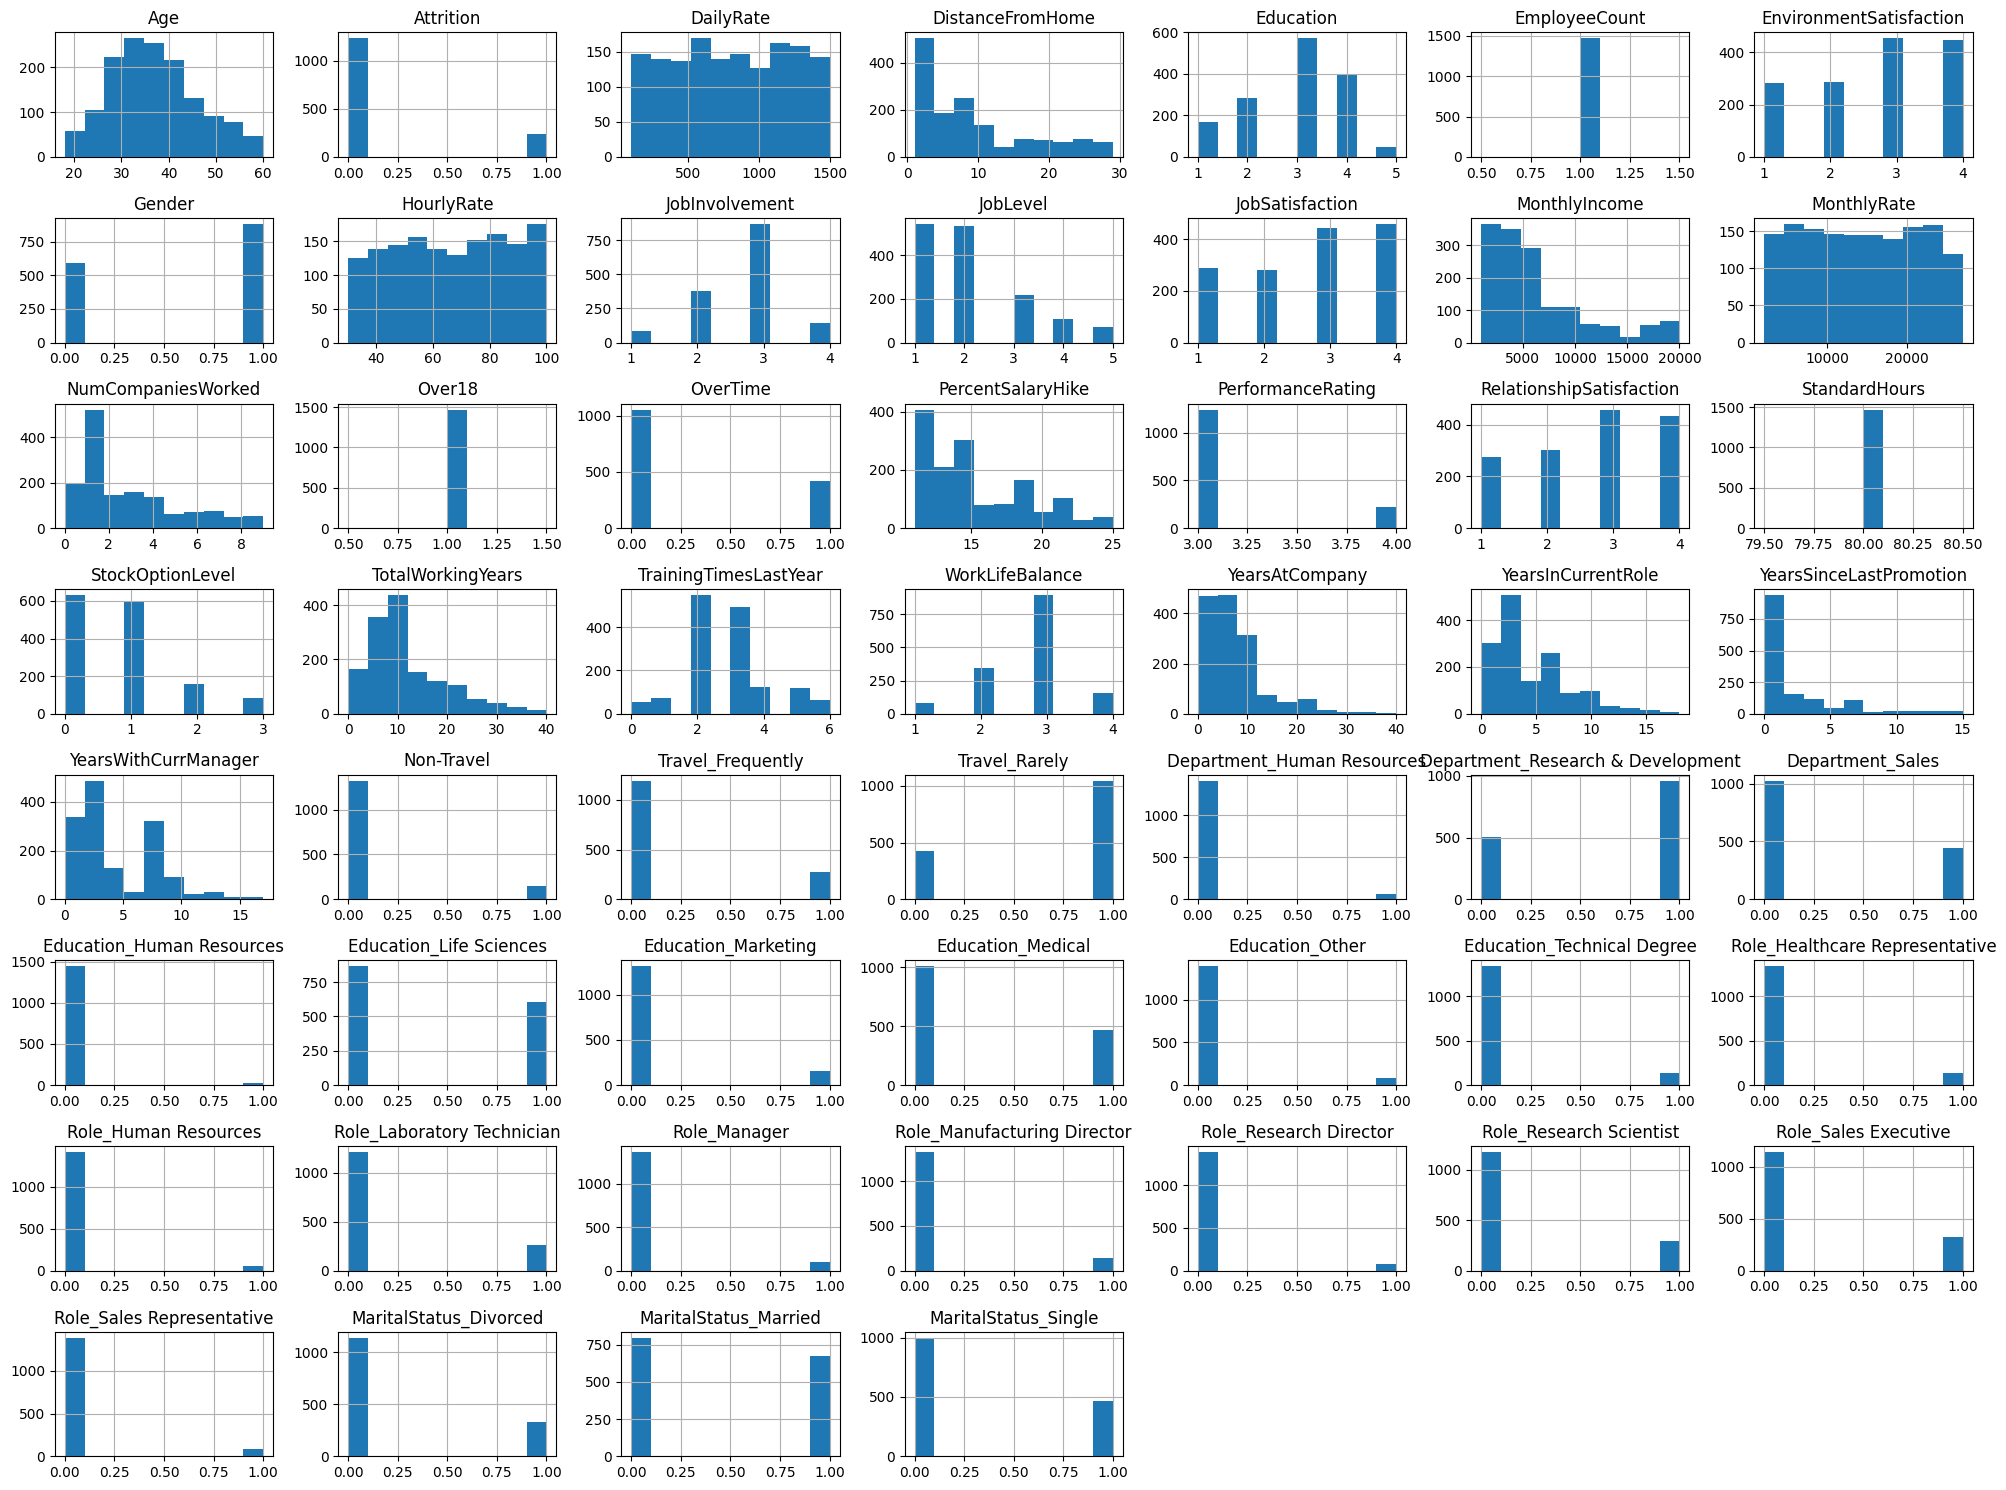

In [13]:
import matplotlib.pyplot as plt

df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

In [ ]:
# EmployeeCount: Usually constant (e.g., always 1 for each row).
# Over18: Often always "Y" (i.e., all employees are adults).
# StandardHours: Frequently a fixed value (like 80), offering no variability.
df =df.drop(['EmployeeCount','Over18','StandardHours'],axis=1)
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Human Resources,Education_Life Sciences,Education_Marketing,Education_Medical,Education_Other,Education_Technical Degree,Role_Healthcare Representative,Role_Human Resources,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,1,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,4,1,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,2,1,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,4,1,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


Model Training

Why use models like logistic regression, decision trees, or random forests?
--These are types of predictive models — they help us predict the likelihood that an employee will leave based on various factors like:

1.Job satisfaction
2.Years at company
3.Salary
4.Work-life balance
5.Performance rating, etc.

🌲 Decision Trees
-Easy to interpret.
-Shows which features (like low salary or long commute) lead to attrition.

🌳 Random Forests
-A group of decision trees working together.
-More accurate and stable than a single tree.



In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Feature/target split
X, y = df.drop('Attrition', axis=1), df['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)


Accuracy: 0.8605442176870748
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       255
           1       0.43      0.15      0.23        39

    accuracy                           0.86       294
   macro avg       0.66      0.56      0.57       294
weighted avg       0.82      0.86      0.83       294



c:\Users\nithu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Feature/target split
X, y = df.drop('Attrition', axis=1), df['Attrition']

# Train-test split with fixed random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization and training
#Adjust the class_weight='balanced' parameter in RandomForestClassifier to give more weight to the minority class.
model = RandomForestClassifier(n_jobs=-1, random_state=42,class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

Check model performance

In [25]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = model.predict(X_test)
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
# Classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))

Accuracy: 0.8809523809523809
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       1.00      0.10      0.19        39

    accuracy                           0.88       294
   macro avg       0.94      0.55      0.56       294
weighted avg       0.90      0.88      0.84       294



Gradient Boosting (from sklearn):
Gradient Boosting works by sequentially training weak models (usually decision trees) and combining their predictions to improve overall performance.

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
model_gb = GradientBoostingClassifier(random_state=42)

# Fit the model
model_gb.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = model_gb.predict(X_test)

# Accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Classification report (precision, recall, f1-score)
report_gb = classification_report(y_test, y_pred_gb)

print(f"Accuracy: {accuracy_gb}")
print(report_gb)

Accuracy: 0.8775510204081632
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.60      0.23      0.33        39

    accuracy                           0.88       294
   macro avg       0.75      0.60      0.63       294
weighted avg       0.85      0.88      0.85       294



In [31]:
import xgboost as xgb
from xgboost import XGBClassifier

# Initialize the XGBoost model
model_xgb = XGBClassifier(random_state=42, scale_pos_weight=1, use_label_encoder=False)

# Fit the model
model_xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = model_xgb.predict(X_test)

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Classification report (precision, recall, f1-score)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f"Accuracy: {accuracy_xgb}")
print(report_xgb)

c:\Users\nithu\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:15:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8843537414965986
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       255
           1       0.65      0.28      0.39        39

    accuracy                           0.88       294
   macro avg       0.77      0.63      0.66       294
weighted avg       0.87      0.88      0.86       294



Feature Importance

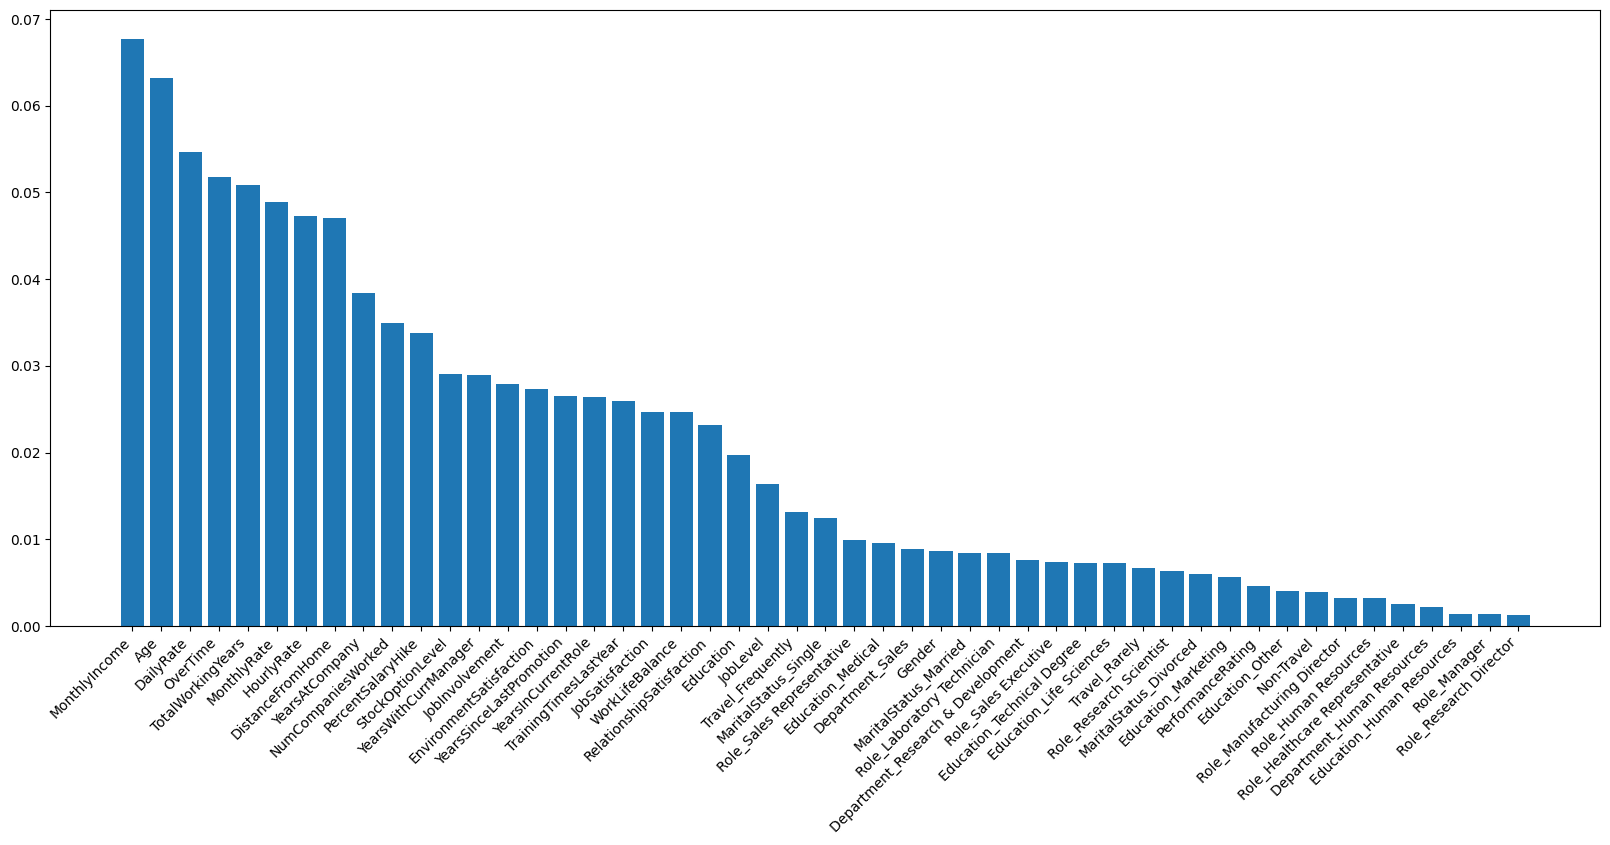

In [18]:
sorted_importances=dict(sorted(zip(model.feature_names_in_, model.feature_importances_),key=lambda x:x[1],reverse=True))
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.bar(sorted_importances.keys(),sorted_importances.values())
plt.xticks(rotation=45,ha='right')
plt.show()

Saving the trained model

In [ ]:
import pickle
filename = "Employee_attrition_trained_model.sav"
pickle.dump(model, open(filename, 'wb'))
#loading the saved model
loaded_model = pickle.load(open('Employee_attrition_trained_model.sav','rb'))

In [34]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Non-Travel', 'Travel_Frequently',
       'Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'Education_Human Resources', 'Education_Life Sciences',
       'Education_Marketing', 'Education_Medical', 'Education_Other',
       'Education_Technical Degree', 'Role_Healthcare Representative',
       'Role_Human Resources', 'Role_Laboratory Technician', 'Role_Manager',
       'Role_Manufacturing Direc

In [35]:
# Replace df with your actual dataframe that has the 'PerformanceRating' column
X_performance = df.drop('PerformanceRating', axis=1)
y_performance = df['PerformanceRating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_performance, y_performance, test_size=0.2, random_state=42)

# Initialize the Random Forest model
performance_model = RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced')

# Train the model
performance_model.fit(X_train, y_train)

# Save the model to a file
filename = "Employee_performance_trained_model.sav"
pickle.dump(performance_model, open(filename, 'wb'))
